In [4]:
from PIL import Image

In [5]:
import numpy as np

In [6]:
img_original = Image.open('stones.jpg', 'r') #Open the image

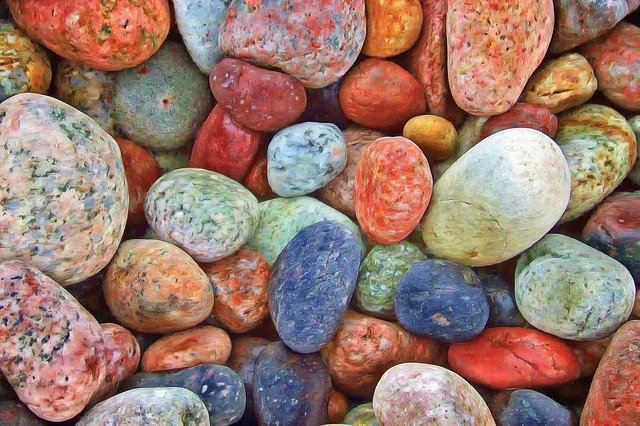

In [7]:
img_original

In [8]:
#Get pixel values in (total_pixels x 3) format with each column corresponding to R,G,B values
pixel_val = np.array(img_original.getdata()) 

In [9]:
pixel_val

array([[ 23,   7,   8],
       [ 30,  14,  14],
       [ 39,  23,  23],
       ...,
       [134,  75,  57],
       [120,  63,  44],
       [129,  74,  54]])

In [10]:
def feature_normalize(pixel_val):
    m, n = pixel_val.shape # m rows, n columns
    mean = np.zeros((1, n)) # To store mean of each column
    std = np.zeros((1, n)) # To store standard deviation of each column
    
    for i in range(n):
        mean[:,i] = np.mean(pixel_val[:,i])
        std[:,i] = np.std(pixel_val[:,i])
    
    X = (pixel_val - mean) / std
    return X, mean, std
        

In [11]:
X, mean, std = feature_normalize(pixel_val)

In [12]:
X

array([[-2.30640557, -2.01457389, -1.72678948],
       [-2.18156875, -1.89048786, -1.62444156],
       [-2.02106427, -1.73094867, -1.47091968],
       ...,
       [-0.32685029, -0.80916671, -0.89094811],
       [-0.57652393, -1.02188562, -1.11270194],
       [-0.41601945, -0.82689329, -0.94212207]])

In [13]:
K = 10 # No.of clusters

In [14]:
def initialize_centroids(X, K):
    X = np.unique(X, axis = 0) # All unique rows in X
    X = np.random.permutation(X) # Permutate X
    centroids = X[1:K+1,:]
    return centroids

In [15]:
def cluster_assignment(centroids, X, K):
    m, n = X.shape
    temp = np.zeros((m,K)) # To store the distance between each row in X and the centroids
    
    for i in range(K):
        temp[:,i] = np.sum(np.square(X - centroids[i,:]), axis=1) # Compute square distance between X and centroids
        
    idx = temp.argmin(axis=1) # Finds the index of centroid whose distance is min with each row
    idx = np.reshape(idx, (m, 1)) # Reshape into (m x 1) 
    
    return idx

In [16]:
def move_centroids(idx, centroids, X, K):
    m, n = X.shape
    temp = np.ones((m,1)) # To compare with each element of idx
    
    for i in range(K):
        bi = ((idx + 1) == temp * (i+1)) # We get 1's corresponding to centroid 'i' in idx
        C = X * bi # All the feature assigned to centroid 'i' are obtained
        centroids[i,:] = np.sum(C, axis=0) / np.sum(bi) # Mean of the features assigned to centroid 'i'
    
    return centroids

In [17]:
def kmeans(X, K, max_iter):
    m, n = X.shape
    centroids = initialize_centroids(X, K)
    
    for i in range(max_iter):
        idx = cluster_assignment(centroids, X, K)
        centroids = move_centroids(idx, centroids, X, K)
    
    distortion_error = np.sum(np.sum(np.square(X - centroids[idx.reshape(m,).tolist()]), axis = 1)) / m
    
    return [idx, centroids, distortion_error]

In [18]:
li = []
for i in range(10):
    li.append(kmeans(X, K, 10)) # Run 10 times and store the results in a list

In [19]:
li

[[array([[3],
         [3],
         [3],
         ...,
         [4],
         [0],
         [4]], dtype=int64),
  array([[-1.05235517, -1.10098975, -1.09383292],
         [-0.32740629, -0.17555976, -0.30502182],
         [-0.26326853,  0.46725769,  0.70030872],
         [-1.84308436, -1.69209604, -1.47843094],
         [ 0.06407897, -0.89019313, -1.01885118],
         [ 0.73881087,  0.99946253,  0.89444608],
         [ 0.98218722,  1.59558549,  1.67249351],
         [-1.29035158, -0.5079772 ,  0.1677585 ],
         [ 0.85229642,  0.39257517,  0.11617487],
         [ 0.9243953 , -0.28735549, -0.57754733]]),
  0.28876548269044655],
 [array([[4],
         [4],
         [4],
         ...,
         [0],
         [9],
         [9]], dtype=int64),
  array([[ 0.19179034, -0.80158463, -0.94212594],
         [ 0.32142401,  0.75067664,  0.66990187],
         [-0.66727605,  0.16822346,  0.73220717],
         [ 1.22837987,  0.65057391,  0.35825675],
         [-1.78304117, -1.63528305, -1.43779975]

In [20]:
distortion_errors = []
for i in range(len(li)):
    distortion_errors.append(li[i][2]) # Store distortion errors in a list

In [21]:
distortion_errors

[0.28876548269044655,
 0.2901625825223055,
 0.2921430292893656,
 0.2882996232133421,
 0.28614760338207246,
 0.2851754007303308,
 0.2900434610910115,
 0.2814532740776492,
 0.2885970134544947,
 0.28310930597152656]

In [22]:
index_of_min = distortion_errors.index(min(distortion_errors))

In [23]:
li[index_of_min]

[array([[1],
        [1],
        [1],
        ...,
        [2],
        [0],
        [2]], dtype=int64),
 array([[-0.91060813, -1.12265459, -1.16822602],
        [-1.82085331, -1.66475295, -1.45461042],
        [ 0.09794237, -0.78749739, -0.92617433],
        [-0.00668929,  0.13353941, -0.02756675],
        [ 0.9637657 , -0.18749169, -0.48647407],
        [-1.22836527, -0.59216606, -0.18719555],
        [ 1.02571674,  1.57126875,  1.62067478],
        [ 1.11722747,  0.66506181,  0.38932354],
        [-0.78620502,  0.05318719,  0.66307007],
        [ 0.33236995,  0.93846776,  0.95262667]]),
 0.2814532740776492]

In [24]:
idx, centroids = li[index_of_min][0], li[index_of_min][1] # idx and centroids values corresponding to low distortion error

In [25]:
idx

array([[1],
       [1],
       [1],
       ...,
       [2],
       [0],
       [2]], dtype=int64)

In [26]:
centroids

array([[-0.91060813, -1.12265459, -1.16822602],
       [-1.82085331, -1.66475295, -1.45461042],
       [ 0.09794237, -0.78749739, -0.92617433],
       [-0.00668929,  0.13353941, -0.02756675],
       [ 0.9637657 , -0.18749169, -0.48647407],
       [-1.22836527, -0.59216606, -0.18719555],
       [ 1.02571674,  1.57126875,  1.62067478],
       [ 1.11722747,  0.66506181,  0.38932354],
       [-0.78620502,  0.05318719,  0.66307007],
       [ 0.33236995,  0.93846776,  0.95262667]])

In [27]:
m, n = X.shape
X_map = centroids[idx.reshape(m,).tolist()] # Map each feature to it's cluster centroid

In [28]:
X_map

array([[-1.82085331, -1.66475295, -1.45461042],
       [-1.82085331, -1.66475295, -1.45461042],
       [-1.82085331, -1.66475295, -1.45461042],
       ...,
       [ 0.09794237, -0.78749739, -0.92617433],
       [-0.91060813, -1.12265459, -1.16822602],
       [ 0.09794237, -0.78749739, -0.92617433]])

In [29]:
pixel_val_compressed = (X_map * std) + mean # Reconstruct pixel values
    

In [30]:
pixel_val_compressed = pixel_val_compressed.astype(int)

In [31]:
pixel_val_compressed

array([[ 50,  26,  23],
       [ 50,  26,  23],
       [ 50,  26,  23],
       ...,
       [157,  76,  54],
       [101,  57,  40],
       [157,  76,  54]])

In [32]:
pixel_val_compressed = tuple(map(tuple, pixel_val_compressed))

In [33]:
img_compressed = Image.new('RGB', (img_original.size)) 
img_compressed.putdata(pixel_val_compressed) # Convert to image

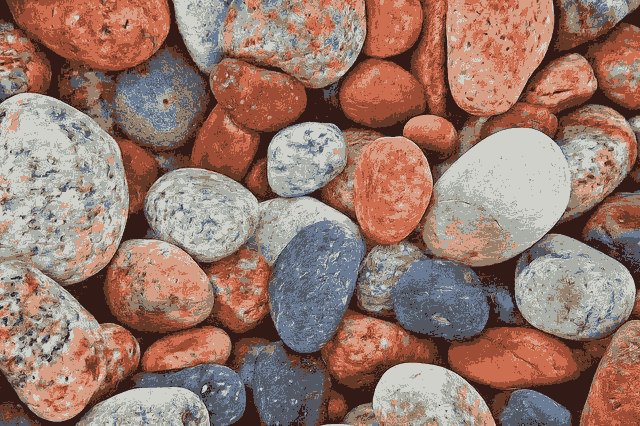

In [34]:
img_compressed

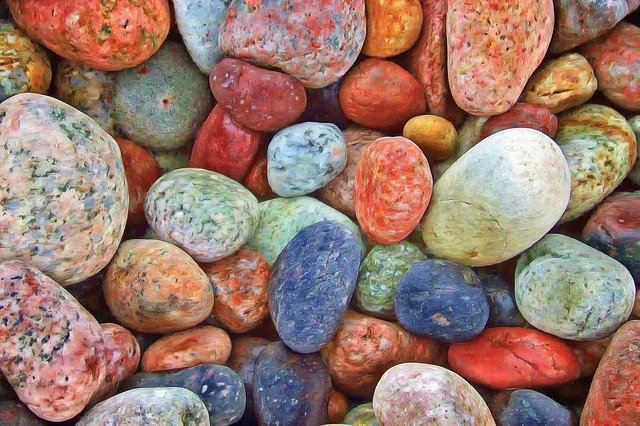

In [35]:
img_original

In [36]:
img_compressed.save("stones_compressed.jpg") 